In [268]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

plt.style.use("tableau-colorblind10")

In [275]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
import pandas as pd

df = pd.DataFrame(
    data.data,
    columns=data.feature_names
)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**01. histogram**: [video](https://www.youtube.com/watch?v=qBigTkBLU6g&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=1&pp=iAQB)

* Ideal bin count is found by trial-and-error

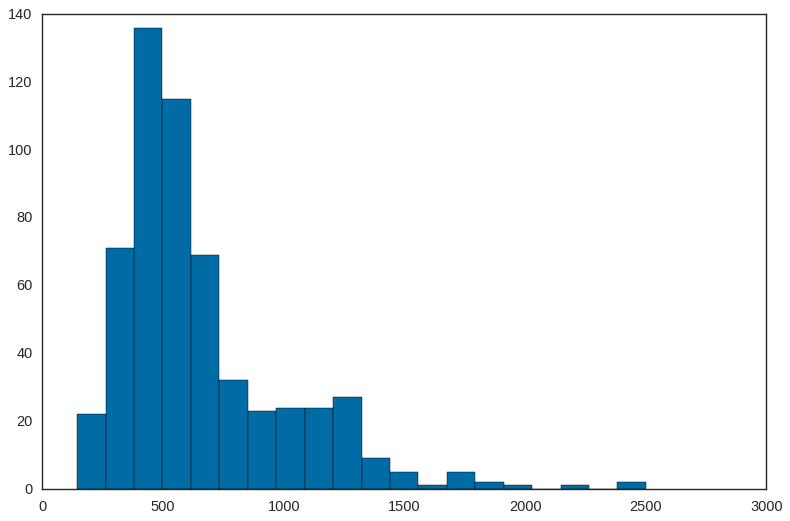

In [ ]:
plt.hist(df["mean area"], bins=20)
plt.show()

**2. probability distribution**: [video](https://www.youtube.com/watch?v=oI3hZJqXJuc&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=2)

* Continuous approximation of discrete histogram

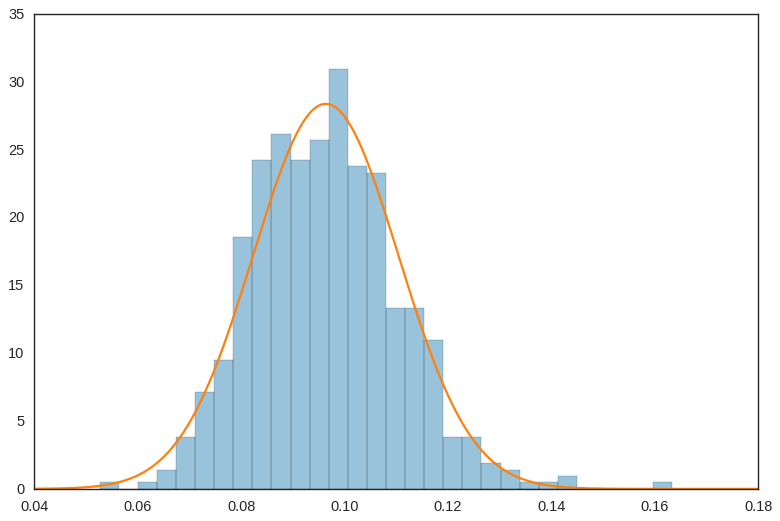

In [ ]:
x = df["mean smoothness"]
μ, σ = norm.fit(x)
# density=True, makes the area under = 1, like probability
plt.hist(x, bins=30, density=True, alpha=0.4)

xmin, xmax = plt.xlim()
xs = np.linspace(xmin, xmax, 200)
plt.plot(xs, norm.pdf(xs, μ, σ), linewidth=2)

plt.show()

**3. normal distribution**: [video](https://www.youtube.com/watch?v=rzFX5NWojp0&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=3)

* Very common in nature
* just two parameters: mean ($\mu$) and standard deviation ($\sigma$)
* Symmetric, centered at $\mu$
* $68\%$ of the area is within $\pm 1 \sigma$, $95\%$ within $\pm 2 \sigma$, $99\%$ within $\pm 3 \sigma$. So, the smaller the $\sigma$, the better representative is $\mu$ of the population.


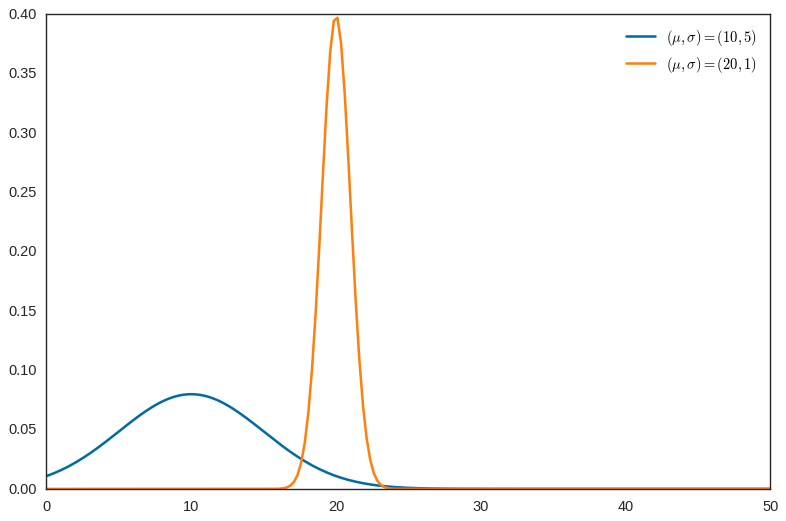

In [ ]:
μ1, σ1 = 10, 5 
μ2, σ2 = 20, 1 # lower std => thinner
xs = np.linspace(0, 50, 200)
plt.plot(xs, norm.pdf(xs, μ1, σ1), label=r"$(\mu,\sigma)=(10,5)$")
plt.plot(xs, norm.pdf(xs, μ2, σ2), label=r"$(\mu,\sigma)=(20,1)$")

plt.legend()
plt.show()

**4. population and estimated parameters**: [video](https://www.youtube.com/watch?v=vikkiwjQqfU&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=6) 
* Population parameters give us the probability distribution.
* Computing population parameters is expensive, so we estimate from sample parameters.
* As (random) sample size increases, sample parameters approach population parameters.

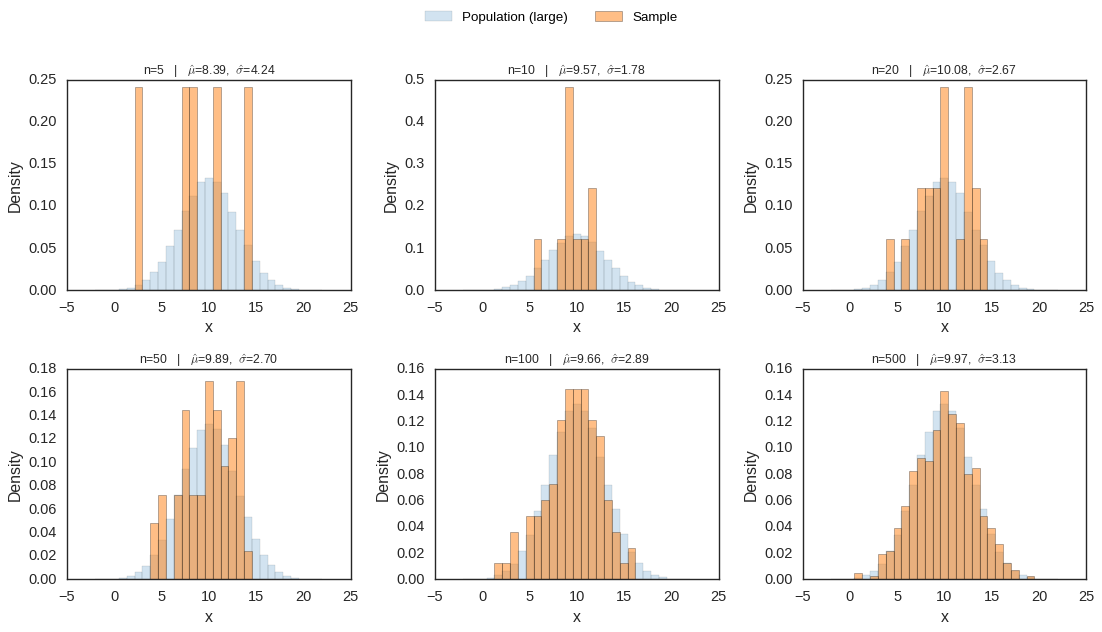

In [276]:
# -----------------------------
# Population parameters
# -----------------------------
μ, σ = 10, 3

# Create a large population sample
population = np.random.normal(μ, σ, size=200_000)

# Sample sizes for subplots
sample_sizes = [5, 10, 20, 50, 100, 500]

# Common bin edges for fair comparison
bins = np.linspace(μ - 4*σ, μ + 4*σ, 30)

fig, axes = plt.subplots(2, 3, figsize=(14, 8))

for ax, n in zip(axes.ravel(), sample_sizes):
    
    # Draw sample of size n
    samples = np.random.normal(μ, σ, size=n)
    
    sample_mu = samples.mean()
    # ddof = 1 => divide by (n-1)
    # (x - \bar{x}) tends to be smaller than (x - μ)
    # To compensate, we divide by (n-1)
    sample_sigma = samples.std(ddof=1)
    
    # Plot population histogram
    ax.hist(
        population,
        bins=bins,
        density=True,
        alpha=0.20,
        color="#1f77b4",  # blue
        label="Population (large)",
    )
    
    # Plot sample histogram
    ax.hist(
        samples,
        bins=bins,
        density=True,
        alpha=0.5,
        color="#ff7f0e",  # orange
        label="Sample",
        edgecolor="black",
        linewidth=0.5
    )
    
    # Title showing convergence
    ax.set_title(
        fr"n={n}   |   $\hat\mu$={sample_mu:.2f},  $\hat\sigma$={sample_sigma:.2f}",
        fontsize=11
    )
    
    ax.set_xlabel("x")
    ax.set_ylabel("Density")

# one global legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

**5. calculating mean, variance, standard deviation**: [video](https://www.youtube.com/watch?v=SzZ6GpcfoQY&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=7)

$\displaystyle \text{sample mean, } \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$

$\displaystyle \text{sample variance, } \hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \bar{x}\right)^2$   // squared unit hard to interpret

$\text{sample standard deviation is } \hat{\sigma}$




**6. mathematical model: [video](https://www.youtube.com/watch?v=yQhTtdq_y9M&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=8)**

**7. hypothesis testing and the null hypothesis**: [video](https://www.youtube.com/watch?v=0oc49DyA3hU&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=9)
* We can reject a hypothesis
* Or, we can fail to reject a hypothesis
* Null hypothesis: Difference between drug A and drug B is zero.
    * Reject $\implies$ Drugs A and B are different.
    * Fail to reject $\implies$ Cannot say A and B are different: they may be same, they may be different.
    * Without null hypothesis, we need a preliminary experiment to formulate the hypothesis (say A and B different by amount $x$) that we can then test in subsequent experiments.